# Getting started with Keras and Tensorflow

<img src="figures/keras-tensorflow-logo.jpg">

## Introduction

* TensorFlow is an end-to-end open source platform for ML 
* It has a comprehensive, flexible ecosystem of tools and libraries 
* Allows to easily build and deploy ML powered applications.
* Not only Neural Networks




## https://keras.io

* Keras is a high-level neural networks API (front-end), written in Python
* Capable of running on top of TensorFlow, CNTK, or Theano (backends)
* Built to simplify access to more complex backend libraries

## https://keras.io

Use Keras if you need a deep learning library that:

* Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
* Supports both convolutional networks and recurrent networks, as well as combinations of the two.
* Runs seamlessly on CPU and GPU.


## https://tensorflow.org

Use *TensorFlow* if you want a finer level of control:

* Build your own NN layers
* Personalized cost function
* More complex architectures than those available on Keras
    
We will be mostly writing python code using Keras libraries, but "under the hood" Keras is using tensorflow libraries.

The documentation is at [keras.io](https://keras.io).


## If you want to use R instead of python

* Keras can run on R as well, it will look quite similar to the code in this notebook
* (but, you know, with <- instead of =)
* You find the docs here: https://keras.rstudio.com/
* We will also have a lab session completely in R

## What is a tensor

The main variables in TensorFlow are, of course, tensors:

> A tensor is often thought of as a generalized matrix. That is, it could be a 1-D matrix (a vector is actually > such a tensor), a 3-D matrix (something like a cube of numbers), even a 0-D matrix (a single number), or a higher dimensional structure that is harder to visualize. The dimension of the tensor is called its rank.





## What is a tensor

The main variables in TensorFlow are, of course, tensors:

> A tensor is often thought of as a generalized matrix. That is, it could be a 1-D matrix (a vector is actually > such a tensor), a 3-D matrix (something like a cube of numbers), even a 0-D matrix (a single number), or a higher dimensional structure that is harder to visualize. The dimension of the tensor is called its rank.

## TensorFlow operates on tensors

> TensorFlow computations are expressed as stateful dataflow graphs. The name TensorFlow derives from the operations that such neural networks perform on multidimensional data arrays, which are referred to as tensors.

## The first step is to build a graph of operations

* NNs are defined in TensorFlow as graphs through which the data flows until the final result is produced
* Before we can do any operation on our data (images, etc) we need to build the graph of tensor operations
* When we have a full graph built from input to output, we can run (flow) our data (training or testing) through it.


## Tensors and data are *not* the same thing
* Tensors are, rather, a symbolic representation of the data
* Think about the function g = f(x): as long as we do not provide a value to x, we will not have a fully computed g
* In this case, "g" is the output tensor, "x" the input tensor, "f" the tensor operation


## Example

* We have a set of color images of size 1000x1000 pixels (1 megapixel) that we want to use on our NN 
* We define tensors with shape (n, 1000, 1000, 3)
    * n is the number of images that we are presenting to our network in one go ("batch block")
    * 1000\*1000: image pixels
    * 3 is the number of channels (RGB)
    * Grayscale images tensors would have shape (n, 1000, 1000, 1)

## One thing to remember when operating on tensors

The dimensions between tensors coming out of the n-th node and those going into the (n+1)-th node *must* match:

* If each sample in our dataset is made of 10 features, the first (input) layer must accept a tensor of shape (n, 10)
* If the first layer in our NN outputs a 3D tensor, the second layer must accept a 3D tensor as input
* Check the documentation to make sure what input-output shapes are allowed

## Here's how a NN layer looks like in TensorFlow:

<img src="figures/run_metadata_graph.png" align="center">

## A neural network in Keras is called a Model

The simplest kind of model is of the Sequential kind:

In [1]:
from keras.models import Sequential

model = Sequential()

This is an "empty" model, with no layers, no inputs or outputs are defined either.

Adding layer is easy:

In [2]:
import keras
from keras.layers import Dense

model.add(Dense(units=3, activation='relu', input_dim=3))
model.add(Dense(units=2, activation='softmax'))


A "Dense" layer is a fully connected layer as the ones we have seen in Multi-layer Perceptrons.
The above is equal to having this network:

<img src="figures/simplenet.png">


If we want to see the layers in the Model this far, we can just call:

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


Notice the number of parameters, can you tell why 12 and 8 parameters for each layer?

Using "model.add()" keeps stacking layers on top of what we have:

In [66]:
model.add(Dense(units=2, activation=None))
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

If we want to see the layers in the Model this far, we can just call:

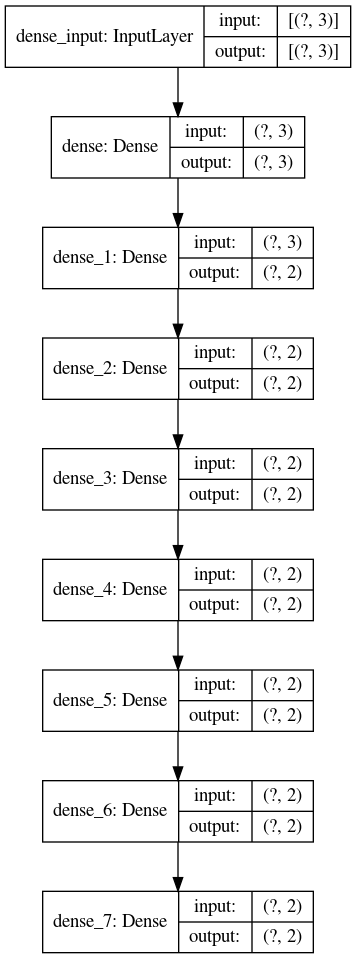

In [11]:
from keras.utils import plot_model

plot_model(model, "figures/simplenet_model.png", show_shapes=True)

## Exercise

* Can you build a sequential model to reproduce the graph shown in the figure? 
* Assume that this is a classifier
* Choose whatever activations you want, wherever possible
* How many classes are we predicting?

<img src="figures/sequence_api_exercise.png">

In [ ]:
fro
plot_model(model, "figures/exercise_model.png", show_shapes=True)

## So many layers, so little time

In [34]:
from keras.layers import Dense

n_neurons = 3
model.add(Dense(n_neurons))

## Keras layers (https://keras.io/api/layers/)

Common layers (we will cover all of these!)

* Trainable
    * <font color='red'>Dense (fully connected/MLP)</font>
    * Conv1D (2D/3D)
    * MaxPooling1D (2D/3D)
    * Recurrent: LSTM/GRU/Bidirectional


* Non-trainable
    * <font color='red'>Dropout</font>
    * Flatten
    * <font color='red'>Merge (Add/Multiply/Subtract/Concatenate)</font>
    * <font color='red'>Activation (Softmax/ReLU/Sigmoid/...)</font>

## Keras layers (https://keras.io/api/layers/)

Other useful layers (we will probably not cover these)

* Lambda (make your own layer!)
* BatchNormalization
* Reshape

## Keras activations (https://keras.io/api/layers/activations/)

Activation functions for regression or inner layers:
* Sigmoid
* Tanh
* ReLU
* LeakyReLU
* Linear (None)

THE activation function for classification (output layer only):
* Softmax (ouputs probabilities for each class)

In [45]:
model = Sequential() 
model.add(Dense(units=2, activation='sigmoid'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=2, activation=keras.activations.relu))
model.add(Dense(units=2, activation='softmax'))

In [48]:
import keras
from keras.layers import Activation

model = Sequential() 
model.add(Dense(units=2))
model.add(Activation('sigmoid'))
model.add(Dense(units=2))
model.add(Activation('relu'))
model.add(Dense(units=2))
model.add(Activation(keras.activations.relu))
model.add(Dense(units=2))
model.add(Activation('softmax'))

Now we want to "compile" the models. This means chosing a Loss function and an Optimizer (the algorithm that finds the minimum loss possible).

In [20]:
model.compile(optimizer='rmsprop',                    #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])                   #the metric doesn't influence the training

model.optimizer.get_config()

{'name': 'RMSprop',
 'learning_rate': 0.001,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

## Passing classes as parameters

* Some parameters can be set by passing a string (optimizer='rmsprop')
* we need to explicitly import the object if we want better control (optimizer=RMSprop())

In [22]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(),                    #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])                   #the metric doesn't influence the training

model.optimizer.get_config()

{'name': 'RMSprop',
 'learning_rate': 0.001,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [23]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=1.0),   #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy'])                   #the metric doesn't influence the training

model.optimizer.get_config()

{'name': 'RMSprop',
 'learning_rate': 1.0,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

## Losses (https://keras.io/api/losses/)

These are the functions used to evaluate and train the neural network

Common losses for classification problems:
* CategoricalCrossentropy
* SparseCategoricalCrossentropy
* KLDivergence

Common losses for regression problems:
* MeanSquaredError
* MeanAbsoluteError

## Metrics (https://keras.io/api/metrics/)

Common metrics for classification:
* Accuracy/CategoricalAccuracy (respectively for integer labels or one-hot labels)
* SparseCategoricalCrossentropy/CategoricalCrossentropy (integer/one-hot labels)
* Precision/Recall
* AUC

Common metrics for regression:
* MeanSquaredError
* MeanAbsoluteError

## Metrics (https://keras.io/api/metrics/)

Notice the "metrics" parameter, which accepts a list of values. Multiple metrics can be shown during training.
Metrics are only to visualize how the training is going, they don't have an effect on training itself

In [24]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=1.0),   #adaptive learning rate method
              loss='sparse_categorical_crossentropy', #loss function for classification problems with integer labels
              metrics=['accuracy', 'recall'])         #the metric doesn't influence the training

## The functional API in Keras

* Sequential() is quite simple, but limited
* What if we want to have multiple input/output layers?
* What if we want a model that is not just a linear sequence of layers?

<img src="figures/functional_api_40_0.png">

# Functional API (https://keras.io/guides/functional_api)

* Layers are now treated as... functions
* Now the tensors are explicit variables
* Remember: g = f(x)
* Careful not to mix up tensors (arguments) and layers (functions)

In [65]:
import tensorflow as tf

x = tf.constant([[2.0, 3.0, 4.0]]) #this is a tensor containing constant values
f = Dense(1, input_dim=3) #this is a layer with 3 inputs, 1 output
g = f(x)

print(x)
print(g)

tf.Tensor([[2. 3. 4.]], shape=(1, 3), dtype=float32)
tf.Tensor([[-6.1265054]], shape=(1, 1), dtype=float32)


Now, let's go back to the first neural network we built with Sequential()

In [70]:
model = Sequential()

model.add(Dense(units=3, activation='relu', input_dim=3))
model.add(Dense(units=2, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 8         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


And here is how we make the same model with the functional API:

In [71]:
from keras.layers import Dense, Input

input_tensor = Input((3,)) #input is a bit like a layer, but it is a function that returns a tensor

dense1 = Dense(3, activation='relu') #Dense is a layer constructor, does NOT return a tensor but a layer
dense2 = Dense(2, activation='relu')

dense1_out = dense1(input_tensor) #when you apply a layer to a tensor, you get another tensor as output
dense2_out = dense2(dense1_out)
output_tensor = dense2_out

model = keras.Model(inputs=input_tensor, outputs=output_tensor, name="functional API model")
model.summary()

Model: "functional API model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_57 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_58 (Dense)             (None, 2)                 8         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


Note:
* Layer functions (Dense(...)) return layers...
* ... except for Input(), which returns a tensor instead
* We have to explicitly connect the "inputs" tensor to the "outputs" tensor to form the graph
* The input layer is explicitly represented in the first row of the table
* The input layer has 0 parameters

In [81]:
model = keras.Model(inputs=input_tensor, outputs=output_tensor, name="functional API model")
model.summary()

Model: "functional API model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_57 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_58 (Dense)             (None, 2)                 8         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


## Exercise

* Can you use the functional API to reproduce the model shown in the figure? 
* As a hint, I will do all the imports for you, and I will initialize some of the layers
* Check the docs (keras.io) to see how each import should be used


* It's ok if you can't do it! We are just getting started after all...

<img src="figures/functional_api_40_0.png">

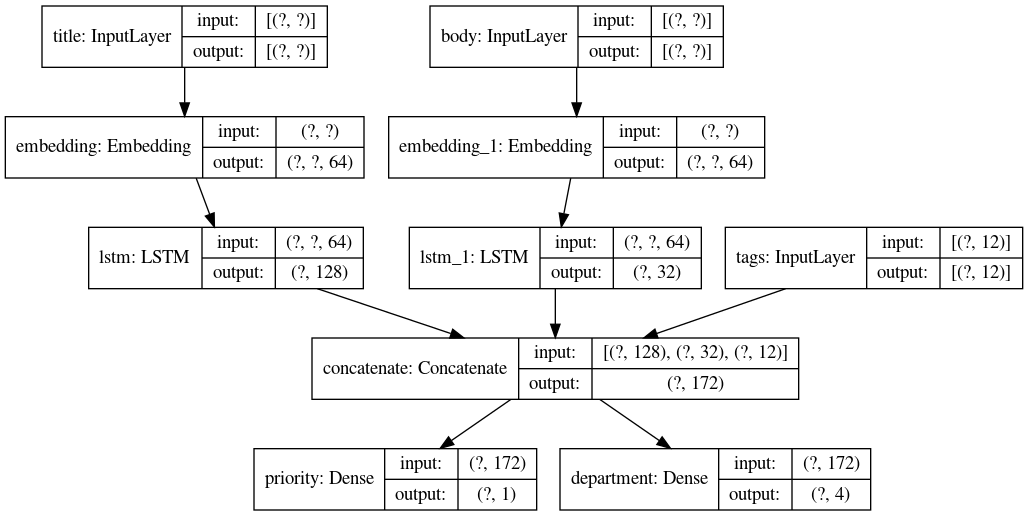

In [95]:
from keras.layers import Input, Embedding, LSTM, Concatenate, Dense

title_input = Input((None,), name="title")
title_embed = Embedding(1000, 64, name="embedding")
title_lstm = LSTM(128, name="lstm", activation="sigmoid")

tags = Input((12,), name="tags")
concatenate = Concatenate(name="concatenate",axis=-1)

priority = Dense(1, name="priority", activation="...")

title_embed_out = title_embed(title_input)
title_lstm_out = title_lstm(title_embed_out)

concatenate_all = concatenate([title_lstm_out, ..., ...])

priority_out = priority(concatenate_all)

model = keras.Model(inputs=[..., ..., ...], outputs=[..., ...])
plot_model(model, "figures/apinet_model.png", show_shapes=True)